Анощенкова Анна 3824М1ПМкн

# Лабораторная работа 2: «Разработка сверточной нейронной сети с использованием PyTorch»

## Цели работы

Цель работы — разработать и обучить сверточную нейронную сеть для задачи классификации изображений на наборе данных CIFAR-10 с использованием фреймворка PyTorch.

## Задачи работы

1) Загрузить набор данных CIFAR-10 и выполнить предобработку данных, если это необходимо.
2) Реализовать сверточную нейронную сеть с использованием фреймворка PyTorch.
3) Выбрать подходящую функцию потерь и настроить гиперпараметры обучения.
4) Обучить реализованную нейронную сеть и провести оценку качества её работы.

In [62]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.optim as optim
import os
%matplotlib inline

загрузим данные с помощью torchvision.datasets

In [63]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='dataset/',
                                           train=True,
                                           transform=transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='dataset/',
                                          train=False,
                                          transform=transform,
                                          download=True)

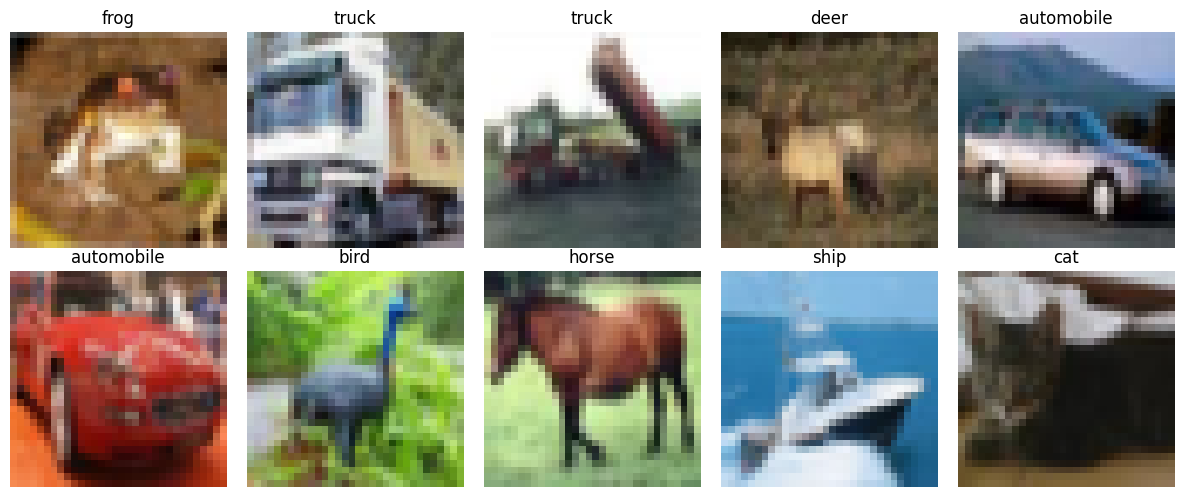

In [64]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for i in range(10):
    img = train_dataset.data[i]
    label = train_dataset.classes[train_dataset.targets[i]]
    axes[i].imshow(img)
    axes[i].set_title(label)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [65]:
print('Original train size:', train_dataset.data.shape)
print(len(train_dataset.targets))
print('Original test size:', test_dataset.data.shape)
print(len(test_dataset.targets))

Original train size: (50000, 32, 32, 3)
50000
Original test size: (10000, 32, 32, 3)
10000


In [66]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [67]:
classes = train_dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [68]:
class myCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(myCNN, self).__init__()
        self.features = nn.Sequential(

            nn.Conv2d(3, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.3),


            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.4),


            nn.Conv2d(128, 256, 3, padding=1), nn.BatchNorm2d(256), nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1), nn.BatchNorm2d(256), nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.4),


            nn.Conv2d(256, 512, 3, padding=1), nn.BatchNorm2d(512), nn.ReLU(),
            nn.Conv2d(512, 512, 3, padding=1), nn.BatchNorm2d(512), nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.5),


            nn.Conv2d(512, 512, 3, padding=1), nn.BatchNorm2d(512), nn.ReLU(),
            nn.Conv2d(512, 512, 3, padding=1), nn.BatchNorm2d(512), nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.5),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [69]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = myCNN(num_classes=10).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

In [70]:
print(model)

myCNN(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.3, inplace=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Dropout(p=0.4, inplac

In [71]:
model = myCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [72]:
!pip install torchsummary

In [73]:
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,928
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
         MaxPool2d-7           [-1, 64, 16, 16]               0
           Dropout-8           [-1, 64, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]          73,856
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,584
      BatchNorm2d-13          [-1, 128, 16, 16]             256
             ReLU-14          [-1, 128,

In [74]:
def evaluate(loader):
    model.eval()
    correct, total, loss_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss_total += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return loss_total / len(loader), 100 * correct / total

In [75]:
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

for epoch in range(num_epochs):
    print(f"\nЭпоха {epoch+1}/{num_epochs} ")
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    # Обучение на train
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.2f}%")

    # Оценка на test
    test_loss, test_acc = evaluate(test_loader)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_acc:.2f}%")


Эпоха 1/50 
Train Loss: 1.5665, Accuracy: 41.71%
Test Loss: 1.2262, Accuracy: 56.02%

Эпоха 2/50 
Train Loss: 1.0247, Accuracy: 63.30%
Test Loss: 0.8986, Accuracy: 68.34%

Эпоха 3/50 
Train Loss: 0.8219, Accuracy: 71.31%
Test Loss: 0.8238, Accuracy: 72.08%

Эпоха 4/50 
Train Loss: 0.7213, Accuracy: 75.08%
Test Loss: 0.7258, Accuracy: 75.79%

Эпоха 5/50 
Train Loss: 0.6428, Accuracy: 78.01%
Test Loss: 0.5992, Accuracy: 79.58%

Эпоха 6/50 
Train Loss: 0.5894, Accuracy: 79.94%
Test Loss: 0.5833, Accuracy: 79.93%

Эпоха 7/50 
Train Loss: 0.5504, Accuracy: 81.41%
Test Loss: 0.6234, Accuracy: 79.20%

Эпоха 8/50 
Train Loss: 0.5105, Accuracy: 82.70%
Test Loss: 0.5356, Accuracy: 82.42%

Эпоха 9/50 
Train Loss: 0.4775, Accuracy: 83.89%
Test Loss: 0.4732, Accuracy: 83.81%

Эпоха 10/50 
Train Loss: 0.4608, Accuracy: 84.44%
Test Loss: 0.5189, Accuracy: 83.09%

Эпоха 11/50 
Train Loss: 0.4338, Accuracy: 85.32%
Test Loss: 0.4562, Accuracy: 84.88%

Эпоха 12/50 
Train Loss: 0.4062, Accuracy: 86.25%
T

Сохранение весов

In [76]:
os.makedirs("saved_models", exist_ok=True)
torch.save(model.state_dict(), "saved_models/myCNN_cifar10.pth")
print("Модель сохранена в saved_models/vgg_cifar10.pth")

Модель сохранена в saved_models/vgg_cifar10.pth


Построение графиков

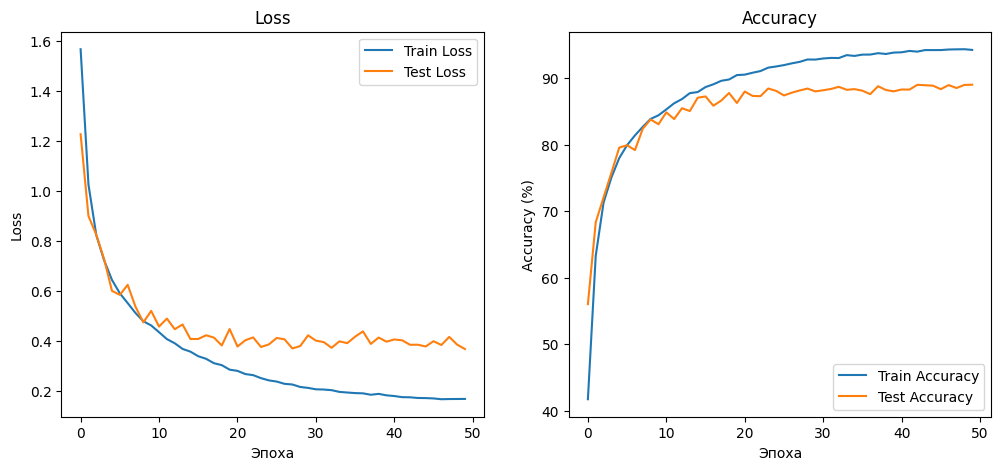

In [77]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [78]:
evaluate(test_loader)

(0.3664286130025417, 89.04)

точность на тестовой выборке составила 89.04%